$
\renewcommand{\vec}[1]{\boldsymbol{\mathbf{#1}}}
\newcommand{\mat}[1]{\boldsymbol{\mathbf{#1}}}
\newcommand{\p}{\partial}
\newcommand{\dd}{\text{d}}
\newcommand{\Alpha}{\mathrm{A}}
$

## Nonlinear Finite Element Formulation

The Figure above illustrates a body $\mathcal{B}$ before and after it undergoes a macroscopic displacement $\vec{u}$ composed of a rigid body translation, rotation and deformation. As is the convention in continuum mechanics, the vector $\vec{X}$ is used to define a particle position in the undeformed configuration and the vector $\vec{x}$ its position after deformation. The weak form of the equilibrium equation or the principle of the virtual work in the reference configuration is given by Equation (\ref{eq_76}).

\begin{equation}\label{eq_76}
\underbrace{\int_{\Omega_0} \rho \delta \vec{u} \cdot \vec{\ddot{u}} dV_0}_{\delta W_{kin}} 
+ \underbrace{\int_{\Omega_0} \delta\mat{E} : \mat{S} dV_0}_{\delta W_{int}}
 = \underbrace{\int_{\Gamma_0} \delta\vec{u} \cdot \vec{t}_0 dA_0 + \int_{\Omega_0} \delta\vec{u} \cdot \vec{b}_0 dV_0}_{\delta W_{ext}}
\end{equation}

The first term of equation represents the variation of the bodies kinetic energy as result of the virtual displacement; alternatively it can be interpreted as the virtual work performed by kinetic forces. The second term represents the variation of potential elastic energy with the virtual displacement or the virtual work of internal elastic forces. The right-hand side term represent the virtual work performed surface and body forces respectively.

The Green-Lagrange strain tensor is defined in terms of the displacement derivative tensor or the deformation gradient tensor trough Equation (\ref{eq_66}). One can observe the Green-Lagrange strain tensor is formed by the Cauchy strain plus quadratic terms, which are ignored in small displacement theory.

\begin{equation}\label{eq_66}
\mat{E} = \frac{1}{2}\left[\left(\frac{\p \vec{u}}{\p \vec{X}}\right) + \left(\frac{\p \vec{u}}{\p \vec{X}}\right)^T + \left(\frac{\p \vec{u}}{\p \vec{X}}\right)^T \left(\frac{\p \vec{u}}{\p \vec{X}}\right)\right]
\end{equation}

The Second Piola-Kirchhoff stress tensor $\mat{S}$ is calculated from the Green-Lagrange stress tensor through the material constitutive. The Generalized Hook's law for the linear elastic solids without prestress is given by the relation

\begin{equation}\label{eq_77}
\mat{S} = \mat{C} : \mat{E}
\end{equation}

where the stiffness coefficient $\mat{C}=C_{ijkl}$ is a fourth order tensor.

### Geometry discretisation

The integral form of the equations of motion for deformable bodies can be solved analytically only in very special conditions, in regular domains under very simple loads. Relevant engineering problems are usually very complex to be solved analytically. However, if the problem domain is subdivided into sufficiently small elements, the field variables distribution within a given element can be reasonably approximated by polynomial functions and the problem solved numerically.

The domain discretisation is one of the key tasks in order to obtain accurate results from a finite element model. The mesh elements should be small enough to represent the problem geometry and for the polynomial distribution assumption to reasonably approximate the field variables distribution. Triangular and tetrahedral elements are often used due to their flexibility in representing complex 2D and 3D geometries respectively. Quadrilateral and hexahedral meshes, on the other hand, often require a lower number of nodes.


### Geometry mapping

The Figure above illustrates a simple coordinate mapping the physical coordinates of a rectangular element and its natural coordinates. Even though is possible to use the element physical coordinates, the use of standard natural coordinates makes the construction of shape functions and their integration much simpler and easier. Coordinate mapping is used to transform the geometry and problem variables from the physical to the natural coordinates. When combined with high order elements, coordinate mapping can also be used to represent elements with curved edges. The Cartesian coordinates, in the reference configuration, of a point inside the element are then given by Equations (\ref{eq_01}) and (\ref{eq_02}).

\begin{equation}\label{eq_01}
X \left(\xi, \eta \right) = \sum h_i\left(\xi, \eta \right) X_i
\end{equation}
\begin{equation}\label{eq_02}
Y \left(\xi, \eta \right) = \sum h_i\left(\xi, \eta \right) Y_i
\end{equation}

where $X_i$ and $Y_i$ are the coordinates of node $i$ in the reference configuration and $h_i$ are  linearly independent shape functions which assume a value one at node i and a value zero at the other nodes. For a nine node rectangular element, one valid definition of $h_i$ is given by Equation (\ref{eq_03})

\begin{equation}\label{eq_03}
h_i\left(\xi, \eta \right) = c_{0} + c_{1} \xi + c_{2} \eta + c_{3} \eta \xi + c_{4} \xi^{2} + c_{5} \eta^{2} + c_{6} \eta \xi^{2} + c_{7} \eta^{2} \xi + c_{8} \eta^{2} \xi^{2}
\end{equation}

where the constants $c_0$ to $c_8$ are found solving for $N_i\left(\xi_j, \eta_j\right) = \delta_{ij}$ at the nodes. It is straightforward to show that the nine shape functions are then given by

In [1]:
import sympy as sym

In [2]:
export_code = True

In [3]:
def lhs_print(lhs_str, rhs):
    '''
    This function displays the sympy equations adding the left hand side
    defined in the input lhs_str.
    
    Parameters
    ----------
    lhs_str : string
              left hand side of the equation on latex notation
    rhs : sympy expression
    '''
    
    lhs = sym.Symbol(lhs_str)
    # lhs.name = lhs_str
    
    display(sym.core.relational.Eq(lhs, rhs, evaluate=False))

In [4]:
# Number of nodes
n_nodes = 9

# Natural coordinates
xi, eta = sym.symbols('xi, eta')

# Nodal natural coordinates
xi_i = sym.Matrix([-1, 1, 1, -1, 0, 1, 0, -1, 0])
eta_i = sym.Matrix([-1, -1, 1, 1, -1, 0, 1, 0, 0])

# Shape functions
A = sym.zeros(xi_i.shape[0], xi_i.shape[0])
for i in range(xi_i.shape[0]):
    A[i, 0] = 1
    A[i, 1] = xi_i[i]
    A[i, 2] = eta_i[i]
    A[i, 3] = xi_i[i]*eta_i[i]
    A[i, 4] = xi_i[i]**2
    A[i, 5] = eta_i[i]**2
    A[i, 6] = xi_i[i]**2*eta_i[i]
    A[i, 7] = xi_i[i]*eta_i[i]**2
    A[i, 8] = xi_i[i]**2*eta_i[i]**2
Am1 = A.inv()
#
p = sym.Matrix([1, xi, eta, xi*eta, xi**2, eta**2, xi**2*eta, xi*eta**2, xi**2*eta**2])
h_i = sym.zeros(xi_i.shape[0], 1)
for i in range(xi_i.shape[0]):
    ci = Am1 @ sym.eye(xi_i.shape[0])[:, i]
    h_i[i] = (ci.T@p)[0].simplify().factor()


In [5]:
for i in range(n_nodes):
    lhs_print('h_%i'%(i), h_i[i])

Eq(h_0, eta*xi*(eta - 1)*(xi - 1)/4)

Eq(h_1, eta*xi*(eta - 1)*(xi + 1)/4)

Eq(h_2, eta*xi*(eta + 1)*(xi + 1)/4)

Eq(h_3, eta*xi*(eta + 1)*(xi - 1)/4)

Eq(h_4, -eta*(eta - 1)*(xi - 1)*(xi + 1)/2)

Eq(h_5, -xi*(eta - 1)*(eta + 1)*(xi + 1)/2)

Eq(h_6, -eta*(eta + 1)*(xi - 1)*(xi + 1)/2)

Eq(h_7, -xi*(eta - 1)*(eta + 1)*(xi - 1)/2)

Eq(h_8, (eta - 1)*(eta + 1)*(xi - 1)*(xi + 1))

### Automatic code generation

One of the great features of the symbolic package Sympy is it code generator module []. Most symbolic software have some form of exporting the derived formula in form of code for numerical computations. However, the inheritance and overriding in python gives the programmer the possibility of customising the code generator.

In this script, the NumpyPrinter module of Sympy was customised to translate the symbolic equations derived above and to generate a function for numerical evaluation of the integrands in the mass matrix, the stiffness matrix, the internal force vector and surface force vector.

In [6]:
from my_printer import MyPrinter
code_gen = MyPrinter().doprint

In [7]:
ident = '    '
step = 0
file = 'fem/numpy_quad9.py'

comment ="""    '''
    Calculates the integrands of the mass matrix, stiffness matrix and internal
    elastic force vector at a given position r_xi, in natural coordinates. This
    function was created automatically by the symbolic script sympy_quad9.py
    
    Parameters
    ----------
    C : numpy.ndarray[:, :], dtype=numpy.float64
        Material elastisticity tensor, in Voigt notation [Pa]
    rho : float
        Mateiral density [kg/m**3]
    th : float
        Object thickness [m]
    r_i : numpy.ndarray[:, :], dtype=numpy.float64
        Physical coordinates of the elemement nodes [m]
    r_xi : numpy.ndarray[:], dtype=numpy.float64
        Natural coordinates of the Gaussian Point where the integrands are
        evaluated
    u_e : numpy.ndarray[:, :], dtype=numpy.float64
        Displacement of the element nodes
    
    Returns
    -------
    dM : numpy.ndarray[:, :], dtype=numpy.float64
        Mass matrix integrand at the Gaussian point
    df_int : numpy.ndarray[:], dtype=numpy.float64
        Internal elastic force vector integrand at the Gaussian point
    dK_geo : numpy.ndarray[:, :], dtype=numpy.float64
        Geometric stiffness matrix integrand at the Gaussian point
    dK_mat : numpy.ndarray[:, :], dtype=numpy.float64
        Geometric stiffness matrix integrand at the Gaussian point
    '''"""

if (export_code):
    print('Code exported to file %s'%(file))
    
    with open(file, mode='w+') as f:
        
        print('import numpy as np', file=f)
        print('from numba import jit', file=f)        
        print('from .tdot13 import tdot13', file=f)
        print('\n#%% \n', file =f)
        
        print('@jit(nopython=True)', file=f)
        print('def quad9(C, rho, th, r_i, r_xi, u_e):', file=f)
        print(comment, file=f)
        print(ident, file=f)
        
        print(ident+'# Unpacking input variables', file=f)
        for i in range(n_nodes):
            print(ident+'u_%i = u_e[%i]'%(i, 2*i), file=f)
            print(ident+'v_%i = u_e[%i]'%(i, 2*i+1), file=f)
        print(ident, file=f)
        print(ident+'xi = r_xi[0]', file=f)
        print(ident+'eta = r_xi[1]', file=f)
        print(ident, file=f)
        
        print(ident+'# h', file=f)
        print(ident+'h = np.zeros((%i, ), dtype=np.float64)' %(h_i.shape[0]), file=f)
        for i in range(h_i.shape[0]):
            if (code_gen(h_i[i])!='0'):
                text = code_gen(h_i[i]).replace('numpy.', 'np.')
                print(ident+'h[%i] = %s' %(i, text), file=f)
        print(ident, file=f)

    step += 1

Code exported to file fem/numpy_quad9.py


### Displacement discretization

Similarly, other field variables such as the coordinates in the deformed configuration and the displacement field inside the element can be be approximated in terms of their values at the nodes and the shape functions.

\begin{equation}\label{eq_13}
x \left(\xi, \eta \right) = \sum h_i\left(\xi, \eta \right) x_i
\end{equation}
\begin{equation}\label{eq_14}
y \left(\xi, \eta \right) = \sum h_i\left(\xi, \eta \right) y_i
\end{equation}

\begin{equation}\label{eq_15}
u \left(\xi, \eta \right) = \sum h_i\left(\xi, \eta \right) u_i
\end{equation}
\begin{equation}\label{eq_16}
v \left(\xi, \eta \right) = \sum h_i\left(\xi, \eta \right) v_i
\end{equation}

Equations (\ref{eq_15}) and (\ref{eq_16}) can be rewritten in vector form by the equation

\begin{equation}\label{eq_37}
\vec{u} = \mat{N} \vec{u}_e
\end{equation}

where the matrix $\mat{N}$ is given by

\begin{equation}\label{eq_38}
\mat{N} = \begin{bmatrix}
h_0\left(\xi, \eta \right) & 0 & h_1\left(\xi, \eta \right) & 0 & h_2\left(\xi, \eta \right) & 0 & \cdots \\
0 & h_0\left(\xi, \eta \right) & 0 & h_1\left(\xi, \eta \right) & 0 & h_2\left(\xi, \eta \right) & \cdots 
\end{bmatrix}
\end{equation}

The displacement spacial derivative tensor can then be expressed in terms of the displacement at the nodal coordinates and the spacial derivatives of the shape functions by the equation

\begin{equation}\label{eq_21}
\frac{\p \vec{u}}{\p \vec{X}} = \begin{bmatrix}
\frac{\p u}{\p X} & \frac{\p u}{\p Y} \\
\frac{\p v}{\p X} & \frac{\p v}{\p Y}
\end{bmatrix} = \begin{bmatrix}
\frac{\p h_i}{\p X}u_i & \frac{\p h_i}{\p Y}u_i \\
\frac{\p h_i}{\p X}v_i & \frac{\p h_i}{\p Y}v_i
\end{bmatrix} = \begin{bmatrix}
u_0 & u_1 & u_2 & \cdots \\
v_0 & v_1 & v_2 & \cdots
\end{bmatrix} \begin{bmatrix}
\frac{\p h_0}{\p X} & \frac{\p h_0}{\p Y} \\
\frac{\p h_1}{\p X} & \frac{\p h_1}{\p Y} \\
\frac{\p h_2}{\p X} & \frac{\p h_2}{\p Y} \\
\vdots & \vdots
\end{bmatrix} = \mat{U}_e^T \mat{GN}
\end{equation}

The mode shapes are usually defined in terms of the element natural coordinates. The derivatives of the mode shapes with respect with its physical coordinates in the matrix $\mat{GN}$ are calculated applying the chain rule

\begin{equation}\label{eq_22}
\frac{\p h_i}{\p X_j} = \frac{\p h_i}{\p \xi_k} \frac{\p \xi_k}{\p X_j}
\end{equation}
\begin{equation}\label{eq_23}
\mat{GN} = \mat{DN} \; \mat{J}_e^{-1}
\end{equation}

where the matrix $\mat{DN}$ is formed by the derivatives of the mode shapes with respect with its natural coordinates $\left(\xi, \eta\right)$ and the matrix $\mat{J}_e$ is given the Jacobian of the element physical coordinates $\left(X, Y\right)$ in the reference configuration with respect with its natural coordinates $\left(\xi, \eta\right)$.

\begin{equation}\label{eq_24}
\mat{DN} = \frac{\p h_i}{\p \xi_j} = \begin{bmatrix}
\frac{\p h_0}{\p \xi} & \frac{\p h_0}{\p \eta} \\
\frac{\p h_1}{\p \xi} & \frac{\p h_1}{\p \eta} \\
\frac{\p h_2}{\p \xi} & \frac{\p h_2}{\p \eta} \\
\vdots & \vdots
\end{bmatrix}
\end{equation}

\begin{equation}\label{eq_25}
\mat{J}_e = \frac{\p X_i}{\p \xi_j} =\begin{bmatrix}
\frac{\p X}{\p \xi} & \frac{\p X}{\p \eta} \\
\frac{\p Y}{\p \xi} & \frac{\p Y}{\p \eta}
\end{bmatrix}
\end{equation}

The displacement derivative tensor can be calculated by the equation

\begin{equation}\label{eq_26}
\frac{\p \vec{u}}{\p \vec{X}} = \mat{U}_e^T \, \mat{DN} \; \mat{J}_e^{-1}
\end{equation}

In [8]:
# Shape functions derivatives on natural coordinates
dhdxi = sym.zeros(h_i.shape[0], 1)
dhdeta = sym.zeros(h_i.shape[0], 1)
for i in range(h_i.shape[0]):
    dhdxi[i] = h_i[i].diff(xi).expand().simplify().factor()
    dhdeta[i] = h_i[i].diff(eta).expand().simplify().factor()

# Nodal phisical coordinates
X_i = sym.Matrix(sym.symbols('X_:9'))
Y_i = sym.Matrix(sym.symbols('Y_:9'))

# Phisical coordinates as function of nodal coordinates and shape functions
X = (h_i.T@X_i)[0].expand().simplify()
Y = (h_i.T@Y_i)[0].expand().simplify()

# Jacobian matrix
Je = sym.Matrix([[X.diff(xi), X.diff(eta)], 
                 [Y.diff(xi), Y.diff(eta)]])

In [9]:
if (export_code and step==1):
    print('Code exported to file %s'%(file))
    
    with open(file, mode='a') as f:
                
        print(ident+'# dhdxi', file=f)
        print(ident+'dhdxi = np.zeros((%i, ), dtype=np.float64)' %(dhdxi.shape[0]), file=f)
        for i in range(dhdxi.shape[0]):
            if (code_gen(dhdxi[i])!='0'):
                text = code_gen(dhdxi[i]).replace('numpy.', 'np.')
                print(ident+'dhdxi[%i] = %s' %(i, text), file=f)
        print(ident, file=f)
        
        print(ident+'# dhdeta', file=f)
        print(ident+'dhdeta = np.zeros((%i, ), dtype=np.float64)' %(dhdeta.shape[0]), file=f)
        for i in range(dhdeta.shape[0]):
            if (code_gen(dhdeta[i])!='0'):
                text = code_gen(dhdeta[i]).replace('numpy.', 'np.')
                print(ident+'dhdeta[%i] = %s' %(i, text), file=f)
        print(ident, file=f)
        
    step+= 1

Code exported to file fem/numpy_quad9.py


In general, with exception of linear triangular elements, the numerical integration of the weak form of the equilibrium equation is performed numerically through the Gaussian quadrature at specific Gaussian points $\left(\xi_i,\, \eta_i\right)$. This means the element Jacobian $\mat{J}_e$ in Equation (\ref{eq_26}) need not be inverted analytically, rather evaluated at the correspondent Gaussian points and inverted numerically.

In [10]:
text_1 = '''
    # Ne
    Ne = np.zeros((2, 2*h.shape[0]), dtype=np.float64)
    for i in range(h.shape[0]):
        Ne[0, 2*i] = h[i]
        Ne[1, 2*i+1] = h[i]
'''

text_2 = '''
    # DN
    DN = np.zeros((h.shape[0], 2), dtype=np.float64)
    for i in range(h.shape[0]):
        DN[i, 0] = dhdxi[i]
        DN[i, 1] = dhdeta[i]
    
    Je = r_i.T @ DN
    Jem1 = np.linalg.inv(Je)
    
    GN = DN @ Jem1
    dhdX = np.zeros(h.shape[0], dtype=np.float64)
    dhdY = np.zeros(h.shape[0], dtype=np.float64)
    for i in range(h.shape[0]):
        dhdX[i] = GN[i, 0]
        dhdY[i] = GN[i, 1]    
'''

if (export_code and step==2):
    print('Code exported to file %s'%(file))
    
    with open(file, mode='a') as f:

        print(text_1, file=f)        
        print(text_2, file=f)
    
    step += 1

Code exported to file fem/numpy_quad9.py


### Nonlinear internal forces

The tangent Stiffness matrix $\mat{K}$ and the nonlinear internal forces vector $\mat{f}_e$ are derived from the discretisation of the virtual work of internal elastic forces. The inner product in the internal work Equation ($\ref{eq_76}$) is often expressed using the Voigt notation where the Green-Lagrange strain and the Second Piola-Kirchhoff stress are written as one dimensional vectors.

\begin{equation}\label{eq_27}
\delta W_{int} = \int_{\Omega_0} \mat{S} : \delta \mat{E} dV = \int_{\Omega_0} \left(\delta \vec{E}_v\right)^T \vec{S}_v dV
\end{equation}
\begin{equation}\label{eq_30}
\vec{S}_v = \mat{C}_v \vec{E}_v
\end{equation}

where the Second Piola-Kirchhoff stress vector $\vec{S}_v$ is given by the constitutive Equation (\ref{eq_30}) in Voigt notation. The variation of the Green-Lagrange strain vector $\delta \vec{E}_v$ can be written as a function of the variation of the nodal displacements through Equation (\ref{eq_31}).

\begin{equation}\label{eq_31}
\delta \vec{E}_v = \frac{\p \vec{E}_v}{\p \vec{u}_e} \delta \vec{u}_e = \mat{B} \delta \vec{u}_e
\end{equation}
\begin{equation}\label{eq_32}
\vec{u}_e = \begin{bmatrix}
u_0 & v_0 & u_1 & v_1 & u_2 & v_2 & \cdots
\end{bmatrix}^T
\end{equation}

where the nodal displacement $\vec{u}_e$ in vector form is given by Equation (\ref{eq_32}). Different bookkeeping strategies for the derivation of the matrix $\mat{B}$ can be found in the literature for various element types, however the process is trivial with the aid of a mathematical symbolic tool or package. Inserting equation (\ref{eq_31}) into equation (\ref{eq_27}), the variational work of internal forces is given by equation (\ref{eq_33})

\begin{equation}\label{eq_33}
\delta W_{int} = \delta \vec{u}_e^T \int_{\Omega} \mat{B}^T \vec{S}_v dV = \delta \vec{u}_e^T \vec{f}_e\left(\vec{u}_e\right)
\end{equation}

where the Second Piola-Kirchhoff stress tensor can be calculated from the Green-Lagrange stress tensor through the material constitutive Equation (\ref{eq_30}). The term inside the integral is the generalised nonlinear internal elastic force vector.

\begin{equation}\label{eq_34}
\vec{f}\left(\vec{u}_e\right) =  \int_{\Omega_0} \mat{B}^T \vec{S}_v dV_0
\end{equation}

The element volume differential in Equation (\ref{eq_34}) can be expressed in terms of the natural coordinates $\left(\xi, \eta \right)$ the element Jacobian $\mat{J}_e$ by the equation

\begin{equation}\label{eq_77}
dV_0 = h dX dY = h\, \text{det} \left(\mat{J}_e\right) d\xi d\eta
\end{equation}


In [11]:
'''
In the first part, the shape fuctions, shape functions derivatives and the
element Jacobian matrix are obtained as fuction of the natural coordinates. For
simple elements such as a three node triangle, the deformation gradient and the
Gree-Lagrange strain tensor can be expressed directly as a function of the
natural coordinates with ease; for more complex elements the expressions become
larger and is simpler to express them in terms of mode shapes.
'''
#
h = h_i.copy()
del X, Y, h_i
X, Y = sym.symbols('X, Y')

In [12]:
# Mode shapes
h_i = sym.Matrix(sym.symbols('h_:9'))
for i in range(h_i.shape[0]):
    h_i[i] = sym.Function('h_%i'%i)(X, Y)

# Nodal displacements
u_i = sym.Matrix(sym.symbols('u_:9'))
v_i = sym.Matrix(sym.symbols('v_:9'))

# Displacement functions
u = (h_i.T @ u_i)[0]
v = (h_i.T @ v_i)[0]

# Position vector in natural coordinates
xi_vec = sym.Matrix([xi, eta])
# Position vector in physical coordinates
X_vec = sym.Matrix([X, Y])

# Displacemnt vector as a fuction of nodal displacements and shape functions
u_vec = sym.Matrix([u, v])

# Displacement derivative
dudX = sym.zeros(2, 2)
for i in range(dudX.shape[0]):
    for j in range(dudX.shape[1]):
        dudX[i, j] = u_vec[i].diff(X_vec[j])

# Green-Lagrange strain tensor
E = sym.Rational(1, 2)*(dudX + dudX.T + dudX.T@dudX)
# Green-Lagrange strain tensor in Voigt notation
E_vec = sym.Matrix([E[0, 0], E[1, 1], 2*E[0, 1]])

# Nodal displacement in Voigt notation
u_e = sym.zeros(2*u_i.shape[0], 1)
for i in range(u_i.shape[0]):
    u_e[2*i] = u_i[i]
    u_e[2*i+1] = v_i[i]

# B matrix
Be = sym.zeros(E_vec.shape[0], u_e.shape[0])
for i in range(E_vec.shape[0]):
    for j in range(u_e.shape[0]):
        Be[i, j] = (E_vec[i]).diff(u_e[j])

### Stiffness matrix

The tangential stiffness matrix $\mat{K}$ is derived taking the derivative of the internal elastic forces with respect to the nodal displacements. However, since both terms in the integrand are a function of the nodal displacement, the stiffness matrix is given by two terms. The first term in equation (\ref{eq_35}) is referred in the literature as the geometric stiffness while the second is referred as material stiffness.

\begin{equation}\label{eq_35}
\begin{split}
\mat{K} &= \frac{\p \vec{f}_e}{\p \vec{u}_e} = \int_{\Omega_0} \frac{\p \mat{B}^T}{\p \vec{u}_e} \vec{S}_v dV_0 + \int_{\Omega_0} \vec{B}^T \frac{\p \mat{S}_v}{\p \vec{u}_e} dV_0 \\
&= \underbrace{\int_{\Omega_0} \frac{\p \mat{B}^T}{\p \vec{u}_e} \vec{S}_v dV_0}_{\mat{K}_{geo}}  + \underbrace{\int_{\Omega_0} \vec{B}^T \mat{C}_v \mat{B} dV_0}_{\mat{K}_{mat}} 
\end{split}
\end{equation}


Again, different bookkeeping strategies for the derivation of the third order tensor $\p\mat{B}^T/\p\vec{u}_e$ can be found in the literature for various element types, however the process is trivial with the aid of a mathematical symbolic tool or package. If the displacements are infinitesimal such that the stress and strain tensors can be approximated by the linear Cauchy stress tensor and engineering strain tensor respectively, the matrix $\mat{B}$ becomes independent of the nodal displacement vector $\vec{u}_e$, the geometric stiffness tends to zero and the material stiffness tend to the linear stiffness tensor.


In [13]:
# B derivative tensor
dBedue = sym.MutableDenseNDimArray.zeros(Be.shape[0], Be.shape[1], u_e.shape[0])
for i in range(dBedue.shape[0]):
    for j in range(dBedue.shape[1]):
        for k in range(dBedue.shape[2]):
            dBedue[i, j, k] = Be[i, j].diff(u_e[k])

In [14]:
# Dictionairy for better printing
h_dict = {}
for i in range(h_i.shape[0]):
    h_dict.update({h_i[i]: sym.symbols('h[%i]'%(i))})
    h_dict.update({h_i[i].diff(X): sym.symbols('dhdX[%i]'%(i))})
    h_dict.update({h_i[i].diff(Y): sym.symbols('dhdY[%i]'%(i))})

for i in range(E_vec.shape[0]):
    E_vec[i] = E_vec[i].xreplace(h_dict)

for i in range(Be.shape[0]):
    for j in range(Be.shape[1]):
        Be[i, j] = Be[i, j].xreplace(h_dict)

for i in range(dBedue.shape[0]):
    for j in range(dBedue.shape[1]):
        for k in range(dBedue.shape[2]):
            dBedue[i, j, k] = dBedue[i, j, k].xreplace(h_dict)        
        
if (export_code and step==3):
    print('Code exported to file %s'%(file))
    
    with open(file, mode='a') as f:
        
        print(ident+'# E', file=f)
        print(ident+'E = np.zeros((%i, ), dtype=np.float64)' %(E_vec.shape[0]), file=f)
        for i in range(E_vec.shape[0]):
            if (code_gen(E_vec[i])!='0'):
                text = code_gen(E_vec[i]).replace('numpy.', 'np.')
                print(ident+'E[%i] = %s' %(i, text), file=f)
        print(ident, file=f)

        print(ident+'Be = np.zeros((%i, %i), dtype=np.float64)' %(Be.shape[0], Be.shape[1]), file=f)
        for i in range(Be.shape[0]):
            for j in range(Be.shape[1]):
                if (code_gen(Be[i, j])!='0'):
                    text = code_gen(Be[i, j]).replace('numpy.', 'np.')
                    print(ident+'Be[%i, %i] = %s' %(i, j, text), file=f)
        print(ident, file=f)

        print(ident+'dBedu = np.zeros((%i, %i, %i), dtype=np.float64)' %(dBedue.shape[0], dBedue.shape[1], dBedue.shape[2]), file=f)
        for i in range(dBedue.shape[0]):
            for j in range(dBedue.shape[1]):
                for k in range(dBedue.shape[2]):
                    if (code_gen(dBedue[i, j, k])!='0'):
                        text = code_gen(dBedue[i, j, k]).replace('numpy.', 'np.')
                        print(ident+'dBedu[%i, %i, %i] = %s' %(i, j, k, text), file=f)
        print(ident, file=f)
    
    step += 1

Code exported to file fem/numpy_quad9.py


### Mass matrix

The mass matrix is derived from the discretisation of the virtual work of the inertia forces given in equation (\ref{eq_76}). Inserting Equation (\ref{eq_37}) into Equation (\ref{eq_76}) and rearranging, the virtual work of the inertia forces are given by the equation

\begin{equation}\label{eq_39}
\delta W_{kin} = \delta \vec{u}_e^T \left(\int_{\Omega_0} \rho \mat{N}^T\mat{N} dV\right) \vec{\ddot{u}}_e = \delta \vec{u}_e^T \mat{M} \vec{\ddot{u}}_e
\end{equation}

where the mass matrix is given by

\begin{equation}\label{eq_40}
\mat{M} = \int_{\Omega_0} \rho \mat{N}^T \mat{N} dV
\end{equation}

In the Total Lagrange Formulation, the undeformed or initial configuration is used as reference configuration. As a consequence, the mass matrix $\mat{M}$ is constant even for large displacements, which can be exploited to increase the time integration algorithm speed.


### Surface forces vector

The virtual work performed by external surface forces is given by the first term on the right-hand side of Equation (\ref{eq_76}). Although quadrilateral and triangular elements can be used in its discretisation, the use of boundary elements significantly simplifies the discretisation process without accuracy loss since the forces are non-zero at the boundaries only. The discretisation of boundary elements follow the same logic described above for quadrilateral elements. Inserting the discretised displacement field, Equation (\ref{eq_37}), into Equation (\ref{eq_76}), the virtual work performed by external forces is then given by

\begin{equation}\label{eq_41}
W_{ext} =  \int_{\Gamma_0} \delta \vec{u}^T \vec{t} dA = \delta \vec{u}_e^T \int_{\Gamma_0} \mat{N}^T \vec{t} dA = \delta \vec{u}_e^T \vec{g}
\end{equation}

where the generalised forcing vector $\vec{g}$ is given by

\begin{equation}\label{eq_42}
\vec{g} = \int_{\Gamma_0} \mat{N}^T \vec{t} dA
\end{equation}

### Gaussian quadrature

For a triangular elements with three nodes, the shape functions, the integrands on equations (\ref{eq_34}), (\ref{eq_35}) and (\ref{eq_40}) are constant inside the element domain. For more complex elements, the integrals are performed using the Gaussian quadrature rule

\begin{equation}\label{eq_43}
\int_{-1}^{+1}f\left(x\right)dx \approx \sum_{i=1}^{n}w_i f\left(x_i\right)
\end{equation}

where $x_i$ and $w_i$ are the roots and weights of Legendre polynomials respectively. It can be demonstrated the approximation is exact when $f\left(x\right)$ is a polynomial function of degree $2n-1$ or lower. The quadrature can be expanded for nested integrals of multivariable functions.

\begin{equation}\label{eq_44}
\int_{-1}^{+1} \int_{-1}^{+1} f\left(x, y\right) dx dy \approx \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j  f\left(x_i, x_j\right)
\end{equation}


In [15]:
text_3 = '''
    det_Je = np.linalg.det(Je)
    dM = rho*(Ne.T@Ne) * th*det_Je
    
    S = C@E
    df_int = (Be.T@S) * th*det_Je
    dK_geo = tdot13(S, dBedu) * th*det_Je
    dK_mat = (Be.T@C@Be) * th*det_Je
'''


if (export_code and step==4):
    print('Code exported to file %s'%(file))
    
    with open(file, mode='a') as f:
        
        print(text_3, file=f)
                
        print(ident+'return dM, df_int, dK_geo, dK_mat', file=f)        
        

Code exported to file fem/numpy_quad9.py


## Numerical example

This script generates automatically the numerical function script `numpy_quad9.py`. The function **quad9** calculates the integrands on equations (\ref{eq_34}), (\ref{eq_35}) and (\ref{eq_40}) for a given set of natural coordinates. The function is imported and integrated in the class script `obj_quad9.py` which includes methods to calculate numerically the integrals in the aforementioned equations, construct the the mass and stiffness matrices and the internal and external forces vectors. 

A numerical example is performed below to test the numerical routines. The figure below depicts a 2 m long bar, 50 mm high and clamped at the left extremity. The material is modelled with a Young modulus $E=70$ GPa, Poisson's ratio $\nu = 0.3$ and density $\rho = 2700$ kg/$\text{m}^3$. The loading is applied on the right as a traction in the vertical direction $\vec{t} = 3\cdot 10^6 \left[\sin\left(20\cdot 2 \pi t\right)+\sin\left(48\cdot 2 \pi t\right)\right]$.

In [16]:
# Cleaning all variables
%reset -f

In [17]:
# Importing necessary libraries
import numpy as np
import scipy.linalg as sl
import scipy.sparse as ss
import scipy.sparse.linalg as ssl
import scipy.optimize as so
import matplotlib.pyplot as plt
from time import time
from numba import jit, prange

# Local library
import fem

# Display images inline
%matplotlib inline

In [18]:
tmp = fem.EmptyObject()
tmp.L = 2.
tmp.b = 5.e-2

### Generating a simple rectangular mesh

Since the rectangular mesh if very regular, it is easier and straightforward to code the mesh directly. For more complicated meshes, a mesh generator like GMSH can be used, and then arranging it in a way the class `Quad9Obj` can understand.

In [19]:
# Generating an instance of the class Quad9Obj
bar = fem.Quad9Obj()

# X and Y coordinates
x = np.linspace(0., tmp.L, 2*30+1)
y = np.linspace(0., tmp.b, 2*10+1)

# Mesh nodal coordinates
bar.coord = np.zeros((x.shape[0]*y.shape[0], 2), dtype=np.float64)
k = 0
for i in range(x.shape[0]):
    for j in range(y.shape[0]):
        bar.coord[k, :] = [x[i], y[j]] 
        k += 1

# Coordinates of the centre of the elements
xc = x[1:-1:2]
yc = y[1:-1:2]

# Mesh elements
bar.elm = np.zeros((xc.shape[0]*yc.shape[0], 9), dtype=np.int32)

# Organising the nodes into elements by their position
k = 0
n_idex = np.arange(bar.coord.shape[0])
for i in range(xc.shape[0]):
    for j in range(yc.shape[0]):
        bar.elm[k, 0] = n_idex[(bar.coord[:, 0] == x[2*i]) * (bar.coord[:, 1] == y[2*j])]
        bar.elm[k, 1] = n_idex[(bar.coord[:, 0] == x[2*i+2]) * (bar.coord[:, 1] == y[2*j])]
        bar.elm[k, 2] = n_idex[(bar.coord[:, 0] == x[2*i+2]) * (bar.coord[:, 1] == y[2*j+2])]
        bar.elm[k, 3] = n_idex[(bar.coord[:, 0] == x[2*i]) * (bar.coord[:, 1] == y[2*j+2])]
        bar.elm[k, 4] = n_idex[(bar.coord[:, 0] == x[2*i+1]) * (bar.coord[:, 1] == y[2*j])]
        bar.elm[k, 5] = n_idex[(bar.coord[:, 0] == x[2*i+2]) * (bar.coord[:, 1] == y[2*j+1])]
        bar.elm[k, 6] = n_idex[(bar.coord[:, 0] == x[2*i+1]) * (bar.coord[:, 1] == y[2*j+2])]
        bar.elm[k, 7] = n_idex[(bar.coord[:, 0] == x[2*i]) * (bar.coord[:, 1] == y[2*j+1])]
        bar.elm[k, 8] = n_idex[(bar.coord[:, 0] == x[2*i+1]) * (bar.coord[:, 1] == y[2*j+1])]
        k += 1

# Number of nodes
bar.n_nodes = bar.coord.shape[0]
# Number of degrees of freedom per node
bar.n_dpn = 2
# Number of degrees of freedom
bar.n_dofs = bar.n_nodes*bar.n_dpn
# Number of elements
bar.n_elms = bar.elm.shape[0]
# Number of degrees of freedom per element
bar.n_dpe = bar.elm.shape[1]*bar.n_dpn

# List of degrees of freedom per node
bar.dof = np.arange(bar.n_dofs).reshape((bar.n_nodes, bar.n_dpn))
# Sequential list of degrees of freedom
bar.q_idx = np.arange(bar.n_dofs)
# Ative degrees of freedom (dofs not constrained)
bar.actv = np.ones(bar.dof.shape, dtype=bool)

In [20]:
#%% External boundaries

# Gathering all lines in all elements
lin = np.zeros((4*bar.n_elms, 3), dtype=np.int32)
ext = np.ones((4*bar.n_elms, ), dtype=bool)
for i_e in range(bar.n_elms):
    lin[4*i_e+0, :] = bar.elm[i_e, [0, 4, 1]]
    lin[4*i_e+1, :] = bar.elm[i_e, [1, 5, 2]]
    lin[4*i_e+2, :] = bar.elm[i_e, [2, 6, 3]]
    lin[4*i_e+3, :] = bar.elm[i_e, [3, 7, 0]]

# Test if the lines are in the interior or in the exterior
# (exterior lines happen appear in one element, internal lines
# appear in two elements)
for i1 in range(lin.shape[0]):
    for i2 in range(lin.shape[0]):
        s1 = set(lin[i1, :])
        s2 = set(lin[i2, :])
        if ((i1!=i2) and (s1==s2)):
            ext[i1] = False
            ext[i2] = False
            pass

# External lines
bar.lin = lin[ext, :]

### Material properties

In [21]:
# Young's modulus
bar.E = 70.e9 # [Pa]
# Poisson's ratio
bar.nu = 0.3
# Density
bar.rho = 2700 # [kg/m**3]
# Object thickness
bar.th = 5.e-2 # [m]

# Material elasticity tensor (2D, in Voigt notation)
bar.Cm = bar.E/(1.-bar.nu**2.) * np.array([[1., bar.nu, 0.], 
                                          [bar.nu, 1., 0.], 
                                          [0., 0., (1.-bar.nu)/2.]])

### Mass matrix, Internal force vector and stiffness matrix

In order to increase the performance, the algorithm used to calculate the mass matrix, stiffness matrix and elastic force vector is compiled when the routine is first called. This means the routine can take some seconds to run for the first time but it will be much fast through the rest of the script.

In [23]:
# Mass matrix, Internal force vector and stiffness matrix
t0 = time()
bar.M, bar.F, bar.K = bar.intf()
t1 = time()
print(t1-t0)

# Damping matrix (the damping matrix is zero, no damping)
bar.C = np.zeros(bar.M.shape, dtype=np.float64)
bar.C = ss.csc_matrix(bar.C)

0.03304719924926758


### External force vector

In [24]:
# External force density at each node
bar.T = np.zeros((bar.lin.shape[0], bar.lin.shape[1], 2), dtype=np.float64)

# Applying a traction force upwards at the right extremity of the bar
for i_e in range(bar.lin.shape[0]):
    if (bar.coord[bar.lin[i_e, :], 0]==2.).all():
        bar.T[i_e, :, 1] = 2.e6

# Generalised external force vector
bar.G = bar.extf()

### Boundary conditions

In [25]:
# Constraining the nodes on the left extremity of the bar
bar.actv[bar.coord[:, 0]==0., :] = False

# Calculating the constraint matrix N
bar.fixed_constraint()

# Calculating the constrained matrices and vectors
bar.Mc = bar.M[np.ix_(bar.q_c, bar.q_c)]
bar.Kc = bar.K[np.ix_(bar.q_c, bar.q_c)]
bar.Cc = bar.C[np.ix_(bar.q_c, bar.q_c)]
bar.Gc = bar.G[bar.q_c]

# Using full matrices
bar.Mc = bar.Mc.toarray()
bar.Kc = bar.Kc.toarray()
bar.Cc = bar.Cc.toarray()

### Natural frequencies and vibration modes

Calculating the natural frequencies and vibration mode shapes of the undeformed bar. Large displacements are taken into consideration and thus the bar stiffness matrix is dependent of its deformation. This means the natural frequencies and mode shapes vary with the bar deformation.

0
1
2


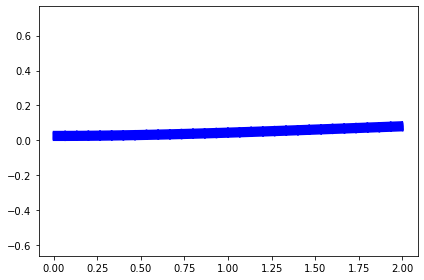

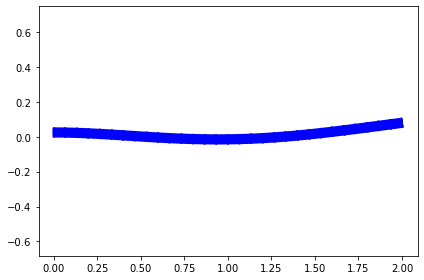

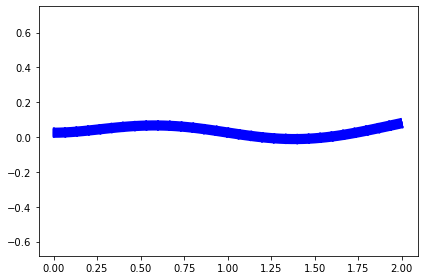

In [26]:
# Natural frequencies and vibration modes
n_m = 15
bar.f_n, bar.phi = fem.freqsh(bar.Mc, bar.Kc, n_m=n_m)
bar.omega_n = 2.*np.pi*bar.f_n

# Plotting the first mode shapes
for i_m in range(3):
    print(i_m)
    h = 1.
    u = h * bar.N@bar.phi[:, i_m]
    bar.uplt(u)

### Time simulation

At a given time step, the equation of motion is given by Equation (\ref{eq_78}), however the elastic forces at n+1 is unknown.

\begin{equation}\label{eq_78}
\mat{M}_c\ddot{\vec{u}}_{n+1} + \mat{C}_c\dot{\vec{u}}_{n+1} + \vec{F}_c\left(\vec{u}_{n+1}\right) = \vec{G}_c
\end{equation}

Approximating the elastic force vector by its Taylor expansion around the time step n, one obtains an expression of which can be integrated numerically. Many numerical explicit and implicit numerical methods can be applied for the time integration. 

\begin{equation}\label{eq_79}
\vec{F}_c\left(\vec{u}_{n+1}\right) = \vec{F}_c\left(\vec{u}_{n}\right) + \left.\frac{\p \vec{F}_c}{\p \vec{u}}\right|_{n}\left(\vec{u}_{n+1}-\vec{u}_{n}\right) = \vec{F}_c\left(\vec{u}_{n}\right) + \mat{K}_c\left(\vec{u}_{n+1}-\vec{u}_{n}\right)
\end{equation}


\begin{equation}\label{eq_80}
\mat{M}_c\ddot{\vec{u}}_{n+1} + \mat{C}_c\dot{\vec{u}}_{n+1} + \mat{K}_c\vec{u}_{n+1} = \vec{G}_c - \vec{F}_c\left(\vec{u}_{n}\right) + \mat{K}_c\vec{u}_{n}
\end{equation}

It can be shown that explicit methods require very small time steps, specially without model order reduction due to high frequencies. Implicit methods, on the other hand, allow greater time steps. A popular implicit numerical algorithm is the Newmark method, implemented in the routine `fem\newmark.py`.

```python
uc, _, _ = fem.newmark(ode, t, u_0, du_0)
```

where t is an array of time steps, u_0 and du_0 are the initial displacements and velocities respectively and **ode** is a function which returns the mass matrix, damping matrix, stiffness matrix and the right-hand side of Equation (\ref{eq_80}) for a given $t$, $\vec{u}$ and $\dot{\vec{u}}$.

```python
Mc, Cc, Kc, Gc-Fc+Kc@uc = ode(t, uc, uc_dot)
```

In [27]:
# ODE

def ampt(t):
    # return np.sin(20.*2.*np.pi*t) + np.sin(48.*2.*np.pi*t)
    return 1.

def ode(t, uc, uc_dot):
    print(t, end='\r')
    u = bar.N@uc
    
    M, F, K = bar.intf(u)
    G = bar.extf()
    
    Mc = M[np.ix_(bar.q_c, bar.q_c)]
    Kc = K[np.ix_(bar.q_c, bar.q_c)]
    Fc = F[bar.q_c]
    Gc = G[bar.q_c]
    
    # ampt = np.sin(20.*2.*np.pi*t) + np.sin(48.*2.*np.pi*t)
    Gc = ampt(t) * Gc
    
    Cc = ss.csc_matrix(Mc.shape, dtype=np.float64)
    
    return Mc, Cc, Kc, Gc-Fc+Kc@uc

In [28]:
# Time integration

# Initial conditions
q0 = np.zeros((n_m, ), dtype=np.float64)
dq0 = np.zeros((n_m, ), dtype=np.float64)

# Time array
dt = 1.e-4
t = np.arange(0., 0.2+dt, dt)

# Numerical time integration
uc, _, _ = fem.newmark(ode, t, bar.phi@q0, bar.phi@dq0)

### Results

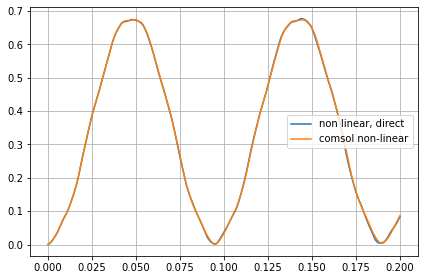

In [29]:
# Results

u_ref = np.zeros((t.shape[0], bar.n_dofs), dtype=np.float64)
for i_t in range(t.shape[0]):
    u_ref[i_t, :] = bar.N @ uc[i_t, :]    

for i_n in range(bar.n_nodes):
    if (bar.coord[i_n, 0]==2.)and((bar.coord[i_n, 1]==0.)):
        dof = bar.dof[i_n, 1]

v_ref = np.zeros(t.shape, dtype=np.float64)
for i_t in range(t.shape[0]):
    v_ref[i_t] = u_ref[i_t, dof]

fig = plt.figure()
plt.plot(t, v_ref, label='non linear, direct')
df_nlin = np.loadtxt('non_linear.txt', comments='%')
plt.plot(df_nlin[:, 0], df_nlin[:, 1], label='comsol non-linear')
plt.grid()
plt.legend()
plt.tight_layout()


The figure above illustrates the results obtained with the code described and the commercial FEM package COMSOL.